# Deep learning from scratch: homework 1, Kaiyuan Hou 2974802

### General instructions

Complete the exericse listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.  

### When submitting this homework:

**Make sure you have put your name at the top of each file**
    
**Make sure all output is present in your notebook prior to submission**

**If possible please do not zip your files when uploading to canvas**

---

In [1]:
# import necessary library for this exercise
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

#### <span style="color:#a50e3e;">Exercise 4. </span>  Normalizing the input of a student debt dataset

In this exercise you will repeat the experiment shown in [Example 1 of Section 8.4 of the class notes](https://jermwatt.github.io/mlrefined/blog_posts/8_Linear_regression/8_4_feature_scaling.html) where standard normalization was shown to enormously improve our ability to perform linear regression using gradient descent on the following student loan dataset.

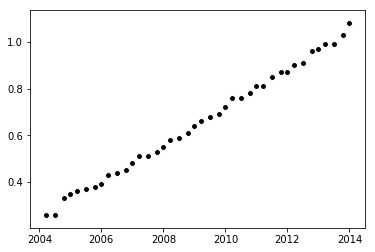

In [2]:
# data input
csvname = 'student_debt.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:,:-1].T
y = data[:,-1:] 

# scatter plot the input data
plt.figure()
plt.scatter(x,y,color = 'k',edgecolor = 'w')
plt.show()

Compare a run of gradient descent using a maximum of $100$ iterations on the original input, to one run when using standard normalized input, where both runs are initialized at the point $\mathbf{w} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$.  Note here that you will likely not achieve any kind of meaningful convergence when minimizing the cost over the original input (as detailed in the example), but for the standard normalized input you can definitely achieve convergence by properly tuning the steplength parameter.  Plot and compare the fit of each run on the original dataset.

Note that you do **not** need to produce the contour plots shown in the notes.

**Remember:** as described in the notes, in evaluating any new test input of a model (learned on normalized training data) you need to normalize the test input precisely the way you did the training data.

In [3]:
#Copy code form classnotes

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history


# compute linear combination of input point
def model(x, w):    
    # stack a 1 onto the top of each input point all at once
    o = np.ones((1,np.shape(x)[1]))
    x = np.vstack((o,x))
    
    # compute linear combination and return
    a = np.dot(x.T,w)
    return a

In [4]:
# Linear regression model
def LR (_x, _y, a):
    # an implementation of the least squares cost function for linear regression
    def _loss(w):    
        # compute the least squares cost
        cost = np.sum((model(_x,w) - _y)**2)
        return cost/float(len(_y))
    w = np.array([[0], [0]])
    return gradient_descent(_loss, a, 100, w)


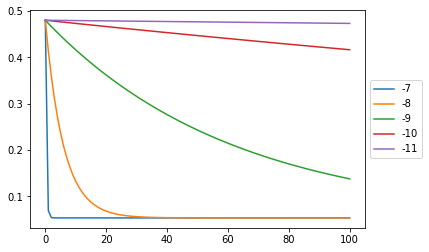

In [5]:
# Find best stepsize for unnormalized data
h1, c1 = LR(x, y, 0.0000001)
h2, c2 = LR(x, y, 0.00000001)
h3, c3 = LR(x, y, 0.000000001)
h4, c4 = LR(x, y, 0.0000000001)
h5, c5 = LR(x, y, 0.00000000001)
# Plot cost function history plot
itr = range(len(c1))
plt.plot(itr, c1)
plt.plot(itr, c2)
plt.plot(itr, c3)
plt.plot(itr, c4)
plt.plot(itr, c5)
plt.legend(['-7', '-8', '-9', '-10', '-11'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

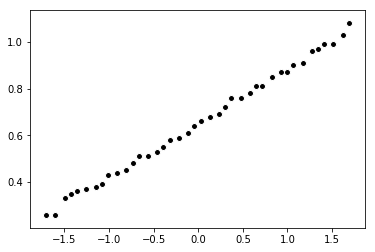

In [6]:
# Normalize data
def standard_normalizer(x):
    # compute the mean and standard deviation of the input
    x_means = np.mean(x,axis = 1)[:,np.newaxis]
    x_stds = np.std(x,axis = 1)[:,np.newaxis]   

    # create standard normalizer function based on input data statistics
    normalizer = lambda data: (data - x_means)/x_stds
    
    # return normalizer and inverse_normalizer
    return normalizer, x_means, x_stds

# return normalization functions based on input x
normalizer, mean, stddev = standard_normalizer(x)

# normalize input by subtracting off mean and dividing by standard deviation
x_normalized = normalizer(x)

# scatter plot the normalized data
plt.figure()
plt.scatter(x_normalized,y,color = 'k',edgecolor = 'w')
plt.show()

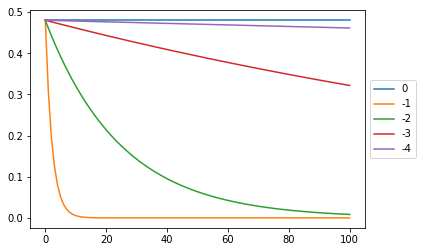

In [7]:
# Find best stepsize for normalized data
nh1, nc1 = LR(x_normalized, y, 1)
nh2, nc2 = LR(x_normalized, y, 0.1)
nh3, nc3 = LR(x_normalized, y, 0.01)
nh4, nc4 = LR(x_normalized, y, 0.001)
nh5, nc5 = LR(x_normalized, y, 0.0001)

# Plot cost function history plot for normalized
itr = range(len(nc1))
plt.plot(itr, nc1)
plt.plot(itr, nc2)
plt.plot(itr, nc3)
plt.plot(itr, nc4)
plt.plot(itr, nc5)
plt.legend(['0', '-1', '-2', '-3', '-4'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


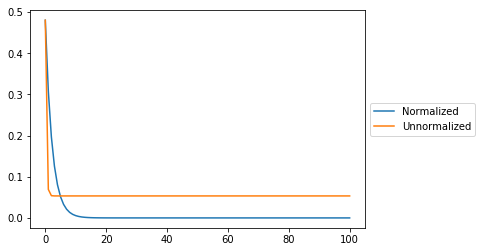

In [13]:

# Compare between the best from each side
plt.plot(itr, nc2)
plt.plot(itr, c1)
plt.legend(['Normalized', 'Unnormalized'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()# Find best stepsize for normalized data
nh1, nc1 = LR(x_normalized, y, 1)
nh2, nc2 = LR(x_normalized, y, 0.1)
nh3, nc3 = LR(x_normalized, y, 0.01)
nh4, nc4 = LR(x_normalized, y, 0.001)
nh5, nc5 = LR(x_normalized, y, 0.0001)

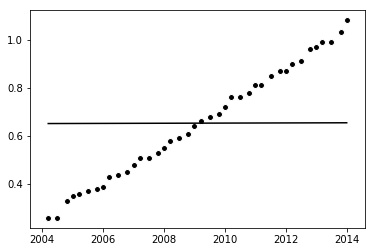

In [9]:

# Scatter plot the input data and fitting line
x1 = np.reshape(np.array(np.min(x)), (1, 1))
x2 = np.reshape(np.array(np.max(x)), (1, 1))
y1 = model(x1, h1[-1])
y2 = model(x2, h1[-1])
plt.figure()
plt.plot([x1[0, 0], x2[0, 0]], [y1[0, 0], y2[0, 0]], 'k-')
plt.scatter(x,y,color = 'k',edgecolor = 'w')
plt.plot()
plt.show()





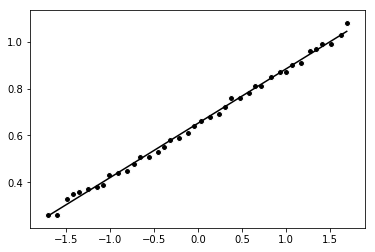

In [10]:
# Scatter plot the normalized input data and fitting line
x1 = np.reshape(np.array(np.min(x_normalized)), (1, 1))
x2 = np.reshape(np.array(np.max(x_normalized)), (1, 1))
y1 = model(x1, nh2[-1])
y2 = model(x2, nh2[-1])
plt.figure()
plt.plot([x1[0, 0], x2[0, 0]], [y1[0, 0], y2[0, 0]], 'k-')
plt.scatter(x_normalized,y,color = 'k',edgecolor = 'w')
plt.plot()
plt.show()

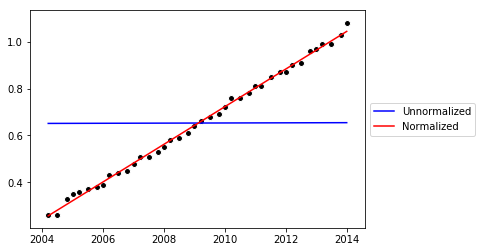

In [12]:
# Reconstruct normalized fitting line on original input data
plt.figure()
x1 = np.reshape(np.array(np.min(x)), (1, 1))
x2 = np.reshape(np.array(np.max(x)), (1, 1))
y1 = model(x1, h1[-1])
y2 = model(x2, h1[-1])
plt.plot([x1[0, 0], x2[0, 0]], [y1[0, 0], y2[0, 0]], 'b-')
x1 = np.reshape(np.array(np.min(x_normalized)), (1, 1))
x2 = np.reshape(np.array(np.max(x_normalized)), (1, 1))
y1 = model(x1, nh2[-1])
y2 = model(x2, nh2[-1])
plt.plot([x1[0, 0] * stddev[0, 0] + mean[0, 0], x2[0, 0] * stddev[0, 0] + mean[0, 0]], [y1[0, 0], y2[0, 0]], 'r-')
plt.scatter(x,y,color = 'k',edgecolor = 'w')
plt.plot()
plt.legend(['Unnormalized', 'Normalized'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
